<img src="./airbnb.png">
<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 5em;">Madrid Data Exploring</span>
</div>

<br />
<div style="text-align: left;">
    <span style="color:#8585BB; font-family: 'Courier New'; font-size: 1.5em;">En las siguientes líneas de código estaremos haciendo una exploración de los datos obtenidos de www.insideairbnb.com para la ciudad de Madrid.</span>
</div>

In [1]:
import sys
import pandas as pd                   
import matplotlib.pyplot as plt      
import datetime as dt                  
import numpy as np                    
import seaborn as sns
import re
from seaborn.linearmodels import corrplot
from IPython.display import HTML
from collections import Counter
import folium
import matplotlib
from matplotlib.colors import ListedColormap
import ipywidgets as widgets



%matplotlib inline 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

('Python version: ', '2.7.12 |Anaconda custom (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]')
('Pandas version: ', u'0.18.1')
('Today: ', datetime.date(2017, 7, 7))


In [2]:
listing = pd.read_csv('./listing_clean.csv', sep=',', index_col='Unnamed: 0')
listing.head()

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1697,2630673,Atico en Lavapiés,13474925,Fede,2014-03-24,True,1.0,1.0,"['email', 'phone', 'reviews']",True,False,Centro,28012,40.408248,-3.698400,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Smok...",50.0,340.0,950.0,$200.00,20.0,1,0.0,4,1125,3 months ago,8,15,15,237,73,2014-05-02,2017-01-04,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,strict,False,False,1,2.04
3248,549483,Puerta del Sol: It´s Perfect!!!!,1091014,Carlos Joaquín,2011-08-31,False,6.0,6.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,Centro,28012,40.414507,-3.703591,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",95.0,625.0,1555.0,$150.00,35.0,1,0.0,3,1125,a week ago,10,20,44,319,8,2012-09-26,2016-11-30,80.0,8.0,8.0,9.0,9.0,9.0,7.0,True,True,strict,True,True,6,0.14
1492,531286,Habitación en La Latina,2609827,Cristina,2012-06-11,False,1.0,1.0,"['email', 'phone', 'facebook']",True,False,Centro,28005,40.410603,-3.708194,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Smoking allow...",40.0,NaN,NaN,NaN,NaN,1,0.0,1,1127,4 days ago,4,4,18,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,flexible,False,False,1,NaN
349,9711634,"Madrid, Gran Vía, beautiful, free parking week...",6088701,Jose A.,2013-04-25,True,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",True,True,Centro,28013,40.420448,-3.707975,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",80.0,NaN,NaN,NaN,35.0,1,0.0,1,180,today,8,18,31,196,112,2015-12-27,2017-04-03,96.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,moderate,False,False,1,7.16
11254,3197869,CASA REINA VICTORIA RELAXING IN THE CITY CENTRE.,16205347,Gema E Igor,2014-05-31,False,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",True,True,Moncloa - Aravaca,28003,40.447652,-3.711694,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",63.0,NaN,1400.0,$200.00,35.0,2,15.0,2,1125,6 days ago,0,0,6,281,9,2014-06-21,2016-07-15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,strict,False,False,1,0.26


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Contruimos un Cmap que usaremos en el transcurso del notebook
</span>
</div>

In [3]:
colors = ['#007D8C', '#6BB7B9', '#79CCCD', '#FFF6E6', '#F16664']
#'#FF7476','#FF9091','#FFA6A7','#FFB8B9','#FFC6C7','#FFD1D2','#FFDADB','#FFE1E2','#FFE7E8','#FFECED'
#FEDCDD, rgb(254,220,221) #FFBABB, rgb(255,186,187) #BF8B8C, rgb(191,139,140) #BF5758, rgb(191,87,88) #7F3A3B, rgb(127,58,59) #5F2B2C, rgb(95,43,44)

my_cmap = ListedColormap(sns.color_palette(colors).as_hex())

colors2 = ['#FEDCDD', '#FFBABB', '#BF8B8C', '#BF5758', '#7F3A3B', '#5F2B2C']

matrix_cmap = ListedColormap(sns.color_palette(colors2).as_hex())

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Sampling</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Al igual que en la parte de Limpieza de datos, me gusta trabajar con datos aleatorios...<br><br></span>
</div>

In [4]:
#Shuffle de las filas de "listing" para que obtengamos una muestra distribuida cuando mostramos el head()

listing = listing.reindex(np.random.permutation(listing.index))
listing.head(3)

,id,name,host_id,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
11308,16166838,Dormitorio con cama matrimonial y baño privado,8154819,Andrea,2013-08-14,False,1.0,1.0,"['email', 'phone', 'reviews']",True,False,Puente de Vallecas,NaN,40.399233,-3.668302,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Smoking...",25.0,NaN,NaN,NaN,NaN,1,10.0,1,14,4 days ago,24,54,81,356,3,2017-02-26,2017-04-02,93.0,10.0,10.0,10.0,10.0,9.0,9.0,True,False,flexible,False,False,1,2.14
11480,11447156,Duplex con terraza y vistas,60178656,Lotta,2016-02-24,False,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",True,True,Latina,28011,40.409720,-3.732922,Apartment,Entire home/apt,5,2.0,1.0,3.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",68.0,500.0,1700.0,NaN,25.0,2,10.0,2,1125,4 weeks ago,15,45,75,161,5,2016-03-13,2016-11-20,92.0,9.0,7.0,10.0,10.0,8.0,8.0,True,False,moderate,False,False,1,0.38
4452,4949149,Design penthouse with huge terrace,2620608,Marion,2012-06-12,True,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",True,True,Centro,28004,40.422470,-3.696062,Apartment,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{Internet,""Wireless Internet"",""Air conditionin...",290.0,1750.0,NaN,$950.00,40.0,1,0.0,2,1125,4 weeks ago,2,5,5,39,25,2015-03-22,2016-12-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,False,strict,False,False,1,1.00


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Tipos de habitaciones</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Es importante conocer las diferencias entre el precio según el tipo de habitación. Vamos a agrupar los datos según la columna room_type y veremos algunos gráficos.</span>
</div>

In [5]:
roomtype=listing.groupby('room_type').id.count()
print roomtype


room_type
Entire home/apt    7901
Private room       5187
Shared room         193
Name: id, dtype: int64


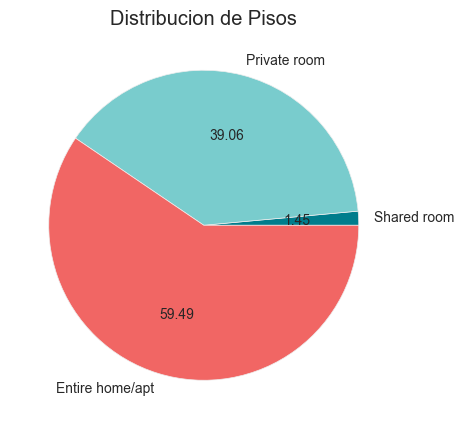

In [6]:
matplotlib.style.use('ggplot')

room = listing.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', colormap = my_cmap, figsize=(5,5), fontsize = 10, autopct = '%.2f',legend = False,
                 title = 'Distribucion de Pisos')
plt.ylabel('')


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Tipos de propiedad</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
En AirBnB se ofrece múltiples variedades de tipos de propiedades; desde opciones regulares como un piso tipo estudio hasta un Búngaloo, un Iglú o una casa en un árbol. Revisamos qué tipo de propiedades hay en Madrid como opción.
</span>
</div>

In [7]:
propertytype = listing.groupby('property_type').id.count()
propertytype

property_type
Apartment             10934
Bed & Breakfast         339
Boat                      1
Boutique hotel            6
Bungalow                  1
Camper/RV                 2
Casa particular           3
Chalet                   23
Condominium             343
Dorm                     44
Earth House               3
Guest suite               3
Guesthouse               39
Hostel                   16
House                   995
Loft                    283
Other                   218
Serviced apartment       13
Tent                      1
Timeshare                 1
Townhouse                 9
Villa                     4
Name: id, dtype: int64

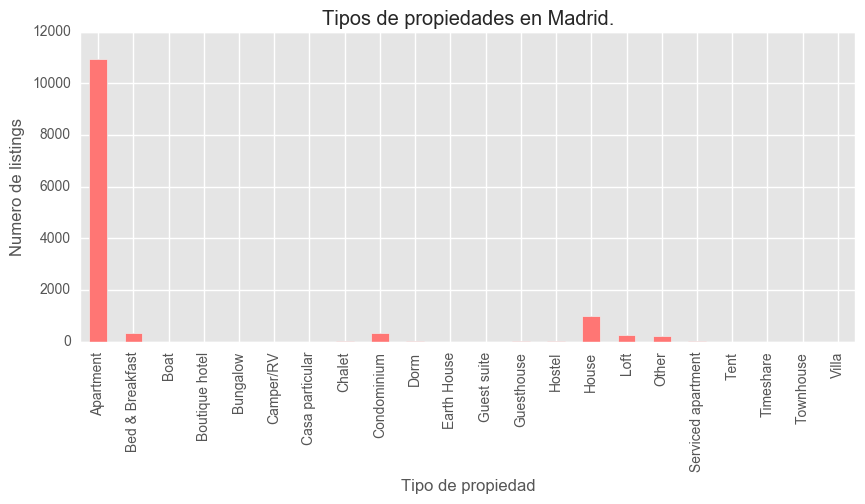

In [8]:
propertytype = listing.groupby('property_type').id.count()
propertytype = propertytype.reset_index()
propertytype = propertytype.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype['property_type']
y_pos = propertytype['Number_Of_Listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#FF7674', 
           figsize =(10,4), 
           title = 'Tipos de propiedades en Madrid.', 
           legend = False)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Numero de listings')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Agrupando un poco la gráfica anterior
</span>
</div>

In [9]:
ptype = ['Bed & Breakfast','Boat','Boutique hotel','Bungalow','Camper/RV','Chalet', 'Dorm', 'Earth House', 'Guest suite', 
         'Guesthouse', 'Hostel','Serviced apartment','Tent', 'Timeshare', 'Townhouse', 'Villa', '']
listing2 = listing

for i in range(0, len(ptype)-1):
    listing2.loc[(listing2.property_type == ptype[i]), ['property_type']] = 'Other'
    

listing2.loc[(listing2.property_type == 'Casa particular' ), ['property_type']] = 'House'


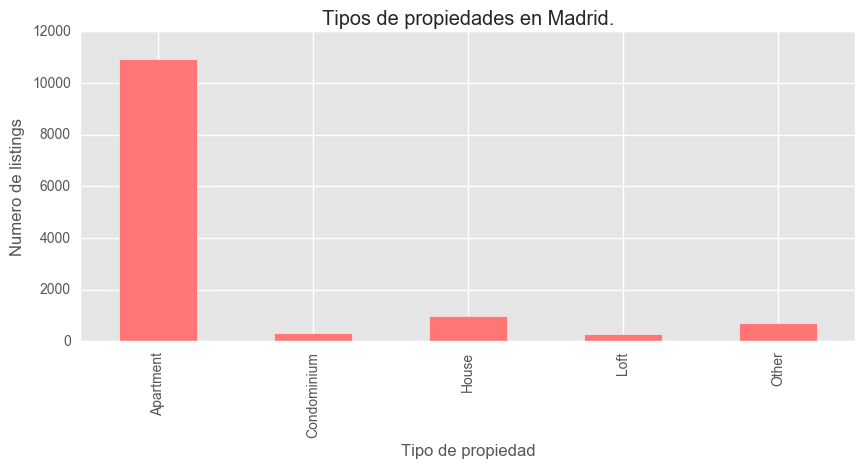

In [10]:
propertytype = listing2.groupby('property_type').id.count()
propertytype = propertytype.reset_index()
propertytype = propertytype.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype['property_type']
y_pos = propertytype['Number_Of_Listings']

propertytype.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#FF7674', 
           figsize =(10,4), 
           title = 'Tipos de propiedades en Madrid.', 
           legend = False)
plt.xlabel('Tipo de propiedad')
plt.ylabel('Numero de listings')

In [11]:
# Analizando los precios para diferentes tipos de habitación y tipos de propiedad
roomProperty = listing.groupby(['property_type','room_type']).price.mean()
roomProperty = roomProperty.reset_index()
roomProperty = roomProperty.sort_values('price',ascending=[0])
roomProperty

,property_type,room_type,price
6,House,Entire home/apt,103.987616
12,Other,Entire home/apt,89.886525
0,Apartment,Entire home/apt,87.174143
3,Condominium,Entire home/apt,84.914439
9,Loft,Entire home/apt,77.476000
7,House,Private room,48.881997
10,Loft,Private room,43.032258
13,Other,Private room,40.362101
1,Apartment,Private room,36.621395
4,Condominium,Private room,35.648649


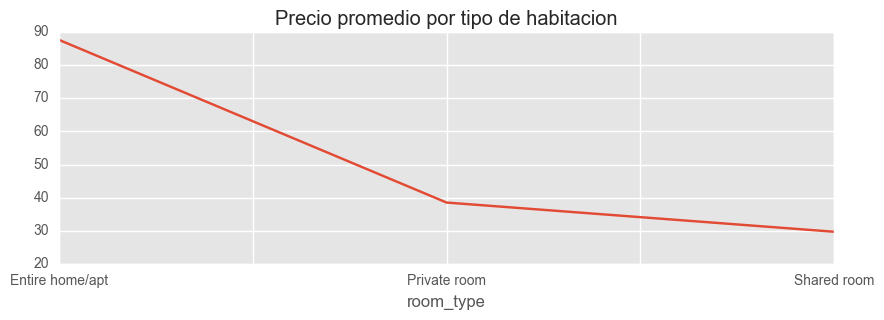

In [12]:
area = listing.groupby('room_type')
room_price = area['price'].agg([np.sum, np.mean, np.std])
fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
fig.set_size_inches(10, 3)
room_price['mean'].plot(title="Precio promedio por tipo de habitacion")

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Matriz de correlación entre todas las variables</span>
</div>

C:\Users\ronny\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\ronny\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


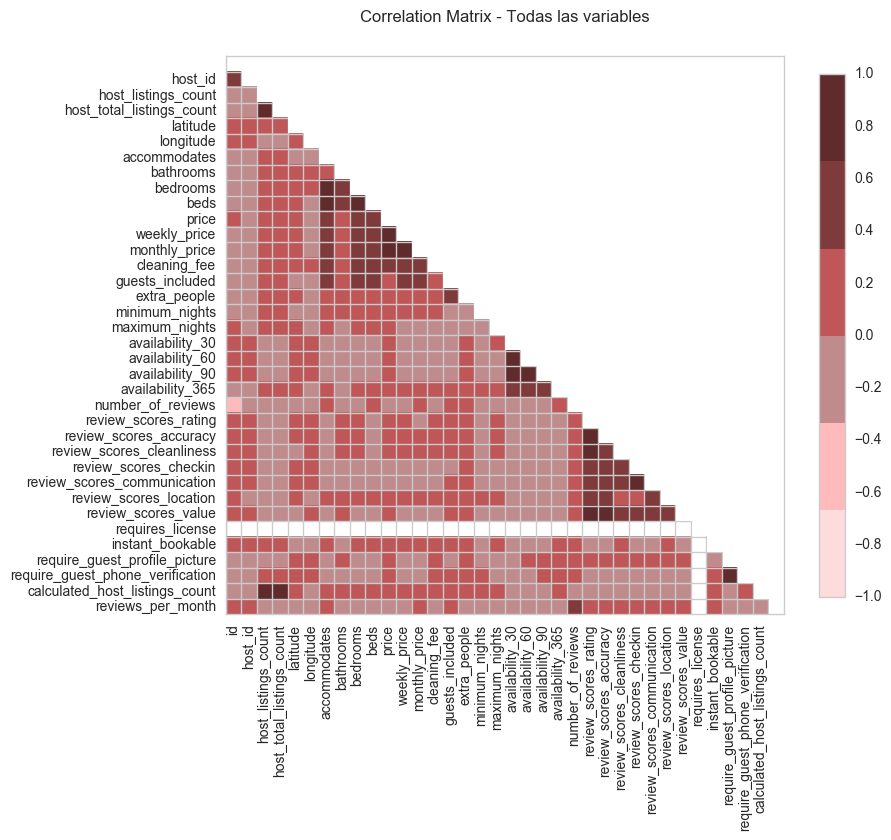

In [13]:
sns.set(style="whitegrid")
cmap = sns.diverging_palette(128, 240, as_cmap=True)
f, ax = plt.subplots(figsize=(9, 9))
corrplot(listing, annot=False, sig_stars=False, diag_names=False, ax=ax, cmap=matrix_cmap)
plt.title('Correlation Matrix - Todas las variables')
plt.show()

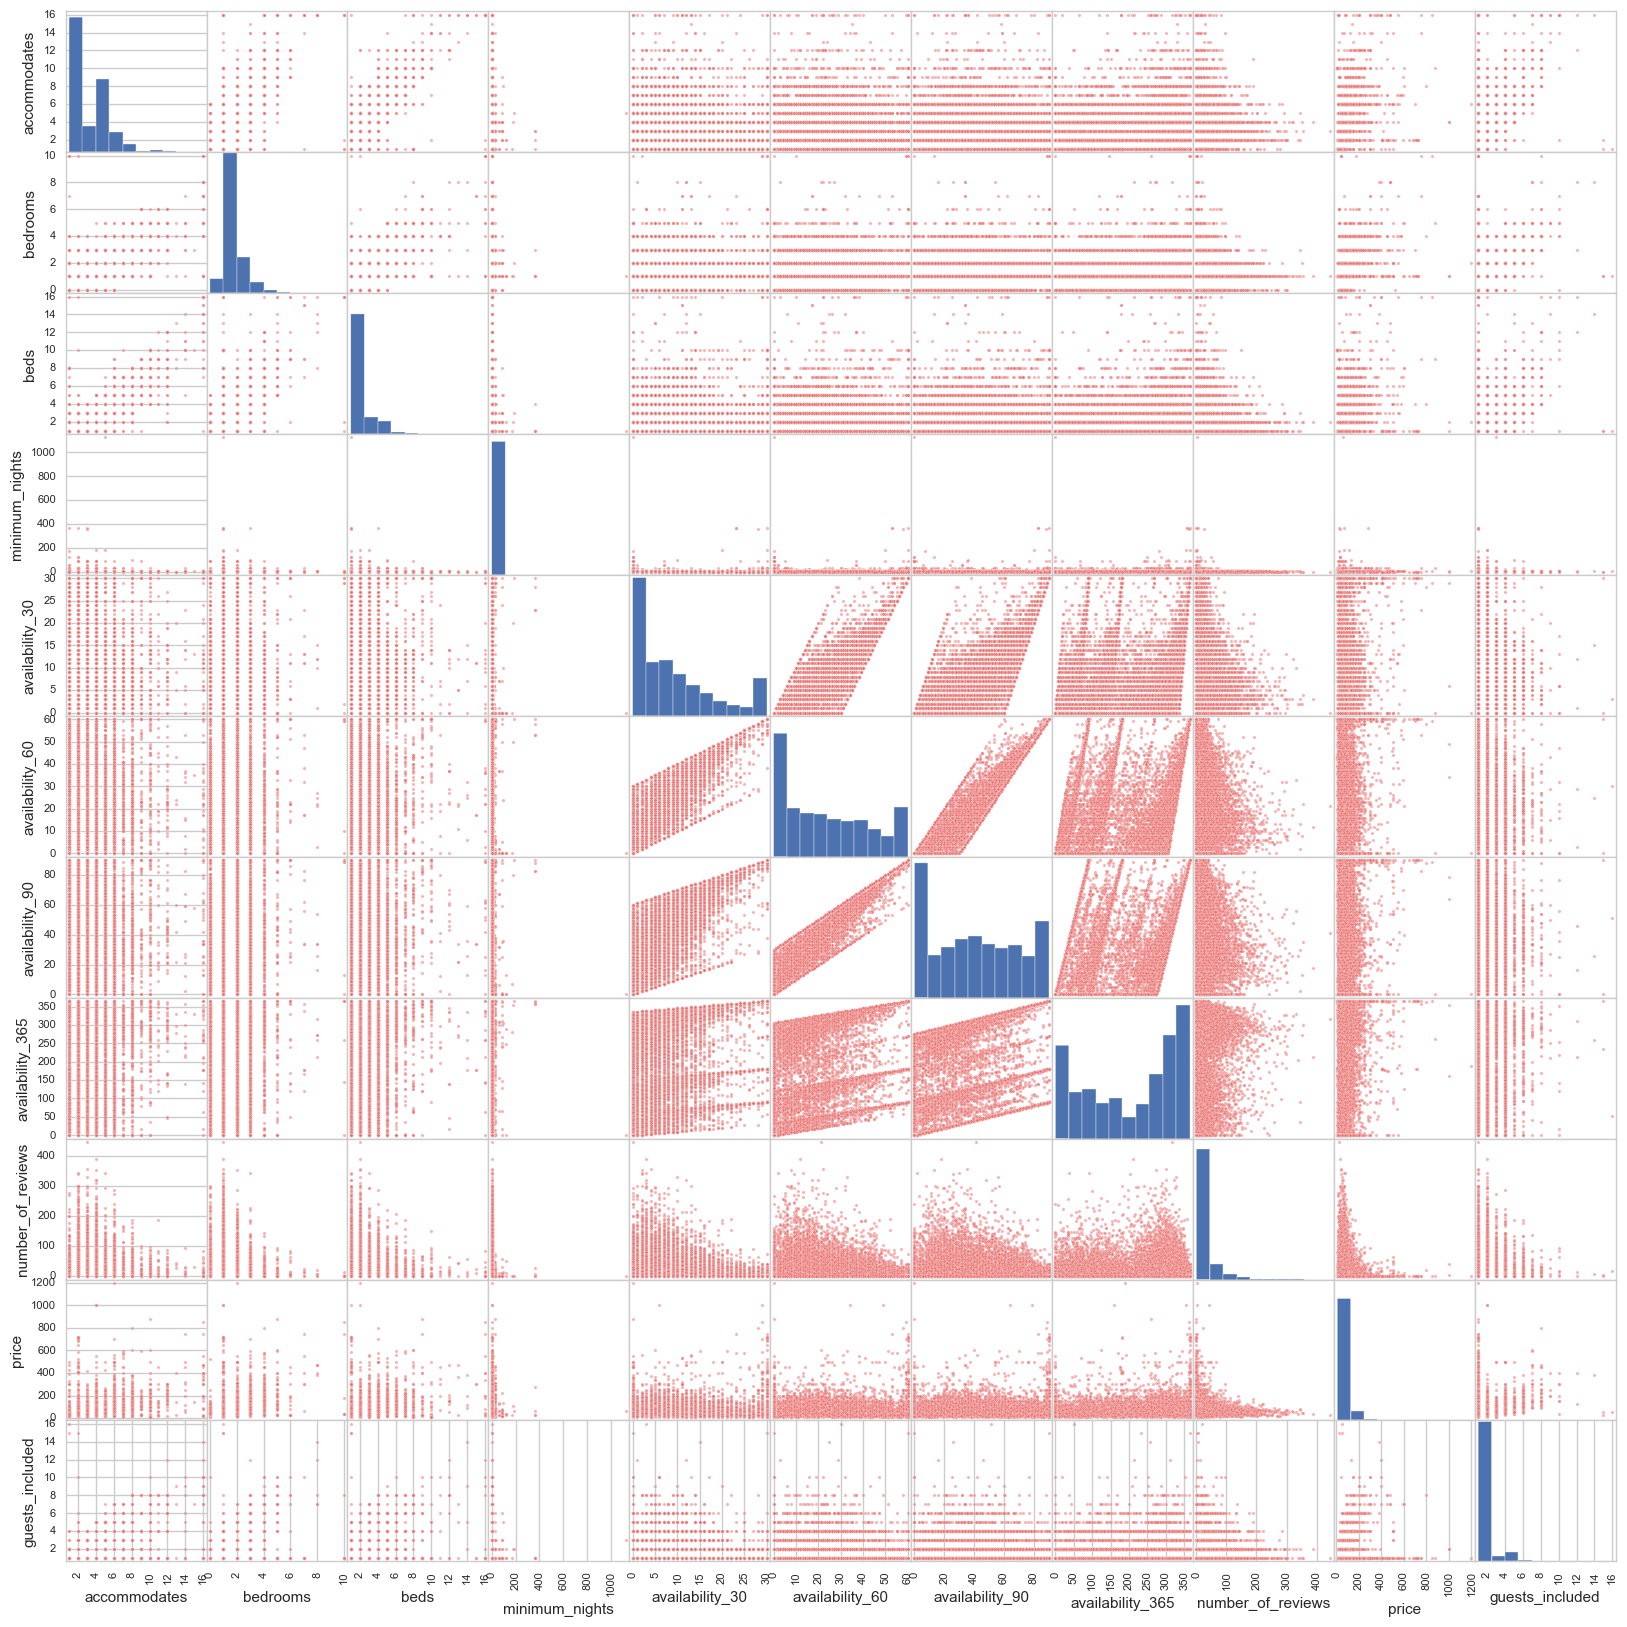

In [14]:
# Verificamos colinealidad y relaciones
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'price', 'guests_included']
axs = pd.scatter_matrix(listing[matrix_cols], figsize=(20, 20), c='#F16664')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Basados en la respuesta de la matriz anterior, no parece haber problemas evidentes entre los features. Vemos que existe cierta relación entre accommodates, bedrooms, beds y guests_included. Tiene lógica: a más camas, más huéspedes pueden alojarse. Vemos que a pesar de que hay relación, esta no se parece a una línea recta que puede ser resultado de la distribución de la propiedad, los arreglos dentro del mismo piso (una o varias camas en una habitación), etc. Por lo tanto, no hay una fuerte evidencia de colinealidad entre los features. <br><br></span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Algunas correlaciones específicas</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Ahora haremos un análisis para verificar qué correlación existe, por ejemplo, entre las camas (beds) y el precio de alquiler del piso (price). (Usando el coeficiente de correlación de Pearson)<br><br></span>
</div>


In [15]:
listing['beds'].corr(listing['price'])

0.4088929129616376

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Vemos que el coheficiente de correlación de Pearson para estas dos columnas es 0.4088. <br><br>
Pearson va desde -1 a +1. Un valor de 0 nos dice que no existe correlación, así que no debemos molestarnos en mirar ese atributo. Un valor de 0.4088 nos dice que hay algo de correlación, aunque podría ser más fuerte.<br><br>
Al menos, tenemos estos atributos que están ligeramente correlacionados. Esto nos da la esperanza de que podríamos ser capaces de construir un predictor (del precio de alquiler del piso) significativo utilizando estas características "débilmente" correlacionadas.<br><br></span>
</div>


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Creamos una lista de potenciales *Features* en los cuáles nos gustaría saber su correlación: </span>
</div>

In [16]:
cols = ['accommodates','bathrooms', 'bedrooms','beds','weekly_price','monthly_price','extra_people','minimum_nights',
        'maximum_nights','availability_30','availability_60','availability_90','availability_365','review_scores_rating',
        'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value','number_of_reviews','calculated_host_listings_count', 'reviews_per_month']

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
El bucle a continuación, nos va a indicar cómo cada unos de los features de la lista anterior, están relacionados con el *feature* "price"... Esto nos ayudará a ver qué relación existe...<br><br>

Todo esto lo hago para entender los datos, entender relaciones, ver la data y poder así ir dándole forma, ya que será importante entender qué factores podrían afectar el precio de alquiler de un piso.
<br></span>

</div>

In [17]:
# Creamos una lista con los coheficientes de correlación de Pearson entre 'price' con cada columna de la lista 'cols'
correlations = [ listing['price'].corr(listing[f]) for f in cols ]

In [18]:
len(cols), len(correlations)

(23, 23)

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Nos aseguramos que el número de *features* seleccionados es igual al número de coheficientes calculados, en este caso 23. En las siguientes celdas mostramos algunos datos y gráficos con estos datos.</span>
</div>

In [19]:
# Creamos un dataframe usando cols y correlations
df2 = pd.DataFrame({'attributes': cols, 'correlation': correlations}) 

In [20]:
df2.head(6)

,attributes,correlation
0,accommodates,0.496485
1,bathrooms,0.296408
2,bedrooms,0.451219
3,beds,0.408893
4,weekly_price,0.837977
5,monthly_price,0.773034


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Cuáles *features* tienes la mayor correlación con el precio?</span>
</div>


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Mirando los valores de la celda anterior, notamos que: <br>
- accommodates: 0.496485<br>
- bathrooms: 0.296408<br>
- bedrooms: 0.451219<br>
- beds: 0.408893<br>
- weekly_price: 0.837977<br>
- monthly_price: 0.773034 <br>
Son los que tienen las correlaciones más altas con el precio. Que las relaciones más altas sean weekly_price y monthly_price tiene sentido ya que son directamente proporcionales al precio: a más días, mayor es el precio. Lo podemos ver con la siguiente gráfica:</span>
</div>

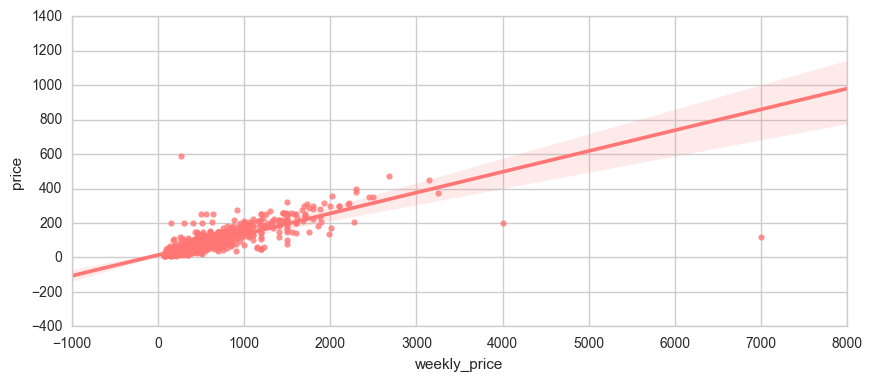

In [21]:
plt.figure(figsize=(10,4))
sns.regplot(x='weekly_price', y='price',data=listing, color = '#FF7674')

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Una frase que se debe recordar siempre:<br><br></span>
</div>
<div style="text-align: center;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 5em;">Correlación no Implica Causalidad</span><br><br>
</div>


<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Data Visualization:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Vamos a graficar los coheficientes de correlación de cada *feature* con respecto a "Price". Empezamos seleccionando las columnas y creando una lista de coheficientes de correlación, llamada "correlations".</span>
</div>

In [22]:
# Creamos una función para graficar un dataframe con columnas string y valores numéricos.

def plot_dataframe(df, y_label):  
    color='#FF7674'
    fig = plt.gcf()
    fig.set_size_inches(18, 5)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75) 
    plt.show()

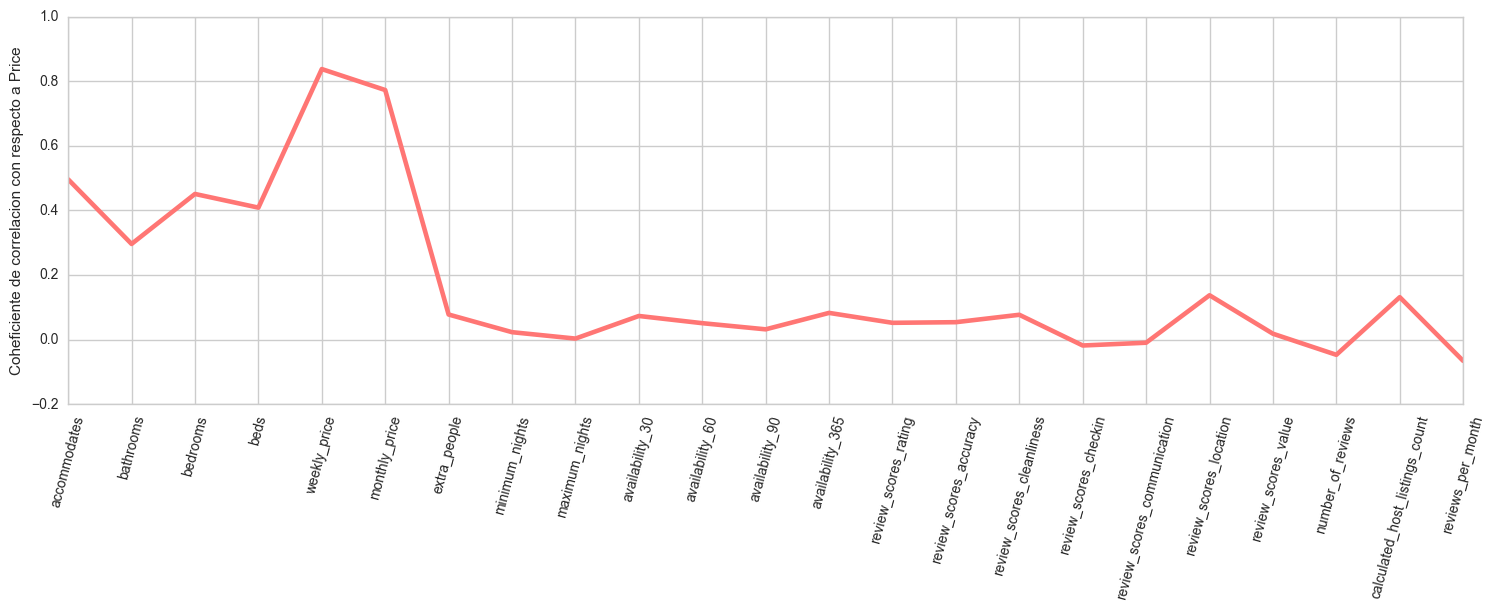

In [23]:
# Graficamos usando la función creada.
plt.figure(figsize=(10,4))
plot_dataframe(df2, 'Coheficiente de correlacion con respecto a Price')

In [24]:
# Obtenemos algunas estadísticas para variables numéricas de la tabla "listing"
features = listing[['accommodates','bathrooms', 'bedrooms','beds','weekly_price','monthly_price','review_scores_rating',
                    'number_of_reviews','calculated_host_listings_count','reviews_per_month']]


features.describe().transpose()

C:\Users\ronny\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
accommodates,13281.0,3.179429,1.980922,1.00,2.0,2.0,4.0,16.00
bathrooms,13233.0,1.250586,0.595768,0.00,NaN,NaN,NaN,8.00
bedrooms,13258.0,1.291975,0.822973,0.00,NaN,NaN,NaN,10.00
beds,13233.0,1.979521,1.506672,1.00,NaN,NaN,NaN,16.00
weekly_price,3495.0,414.288126,321.247943,70.00,NaN,NaN,NaN,7000.00
monthly_price,3309.0,1343.058326,983.013246,250.00,NaN,NaN,NaN,25000.00
review_scores_rating,10381.0,91.606011,8.991939,20.00,NaN,NaN,NaN,100.00
number_of_reviews,13281.0,22.950004,38.316181,0.00,1.0,7.0,27.0,446.00
calculated_host_listings_count,13281.0,7.620887,19.646937,1.00,1.0,2.0,4.0,145.00
reviews_per_month,10506.0,1.920654,1.886208,0.02,NaN,NaN,NaN,17.21


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Uno puede ver que la media de reservas en Airbnb es probablemente un apartamento, con a 3-4 personas en 1 o 2 dormitorios.</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Distribución de pisos por zonas:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Ahora haremos algunas gráficas para entender como es la distribución de distintos factores presente en los datos, para conocer diferencia entre zonas de Madrid.</span>
</div>

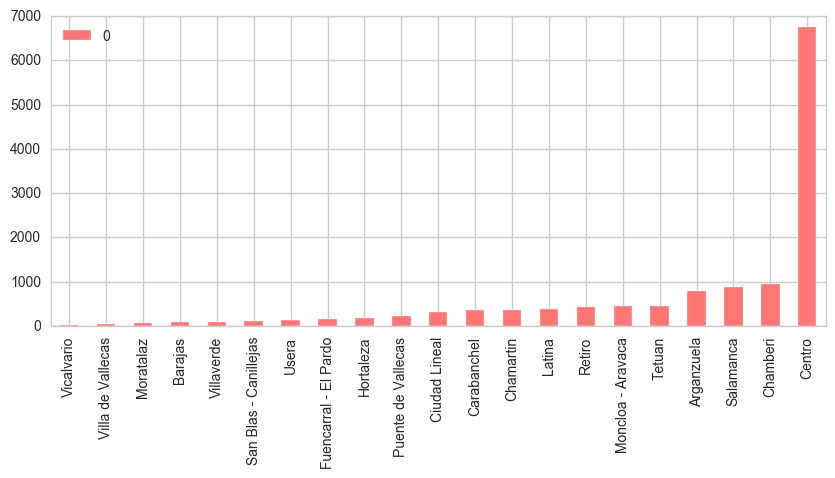

In [25]:
plt.figure(figsize=(10,4))
nb_counts = Counter(listing.neighbourhood_group_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar', color='#FF7674', figsize=(10, 4))

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Usaremos CARTO para graficar nuestros mapas geolocalizados. www.carto.com<br>
</span>
</div>

In [26]:
widgets.HTML(
    value='<iframe width="100%" height="520" frameborder="0" src="https://ronnydeabreu.carto.com/builder/92c6ad1d-36c6-4a02-b94c-b4400456137e/embed" allowfullscreen webkitallowfullscreen mozallowfullscreen oallowfullscreen msallowfullscreen></iframe>',
    disabled=False
)


<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">Podemos observar en el mapa que la mayor concentración de pisos están en pleno Centro de Madrid, concentrándose principalmente en Chueca, Malasaña y Lavapies<br>
</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Barrios más costosos: <br>
    O mejor planteado: Barrios con la media de precios más alta:</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Determinemos cuáles son los barrios más costosos de la capital:</span>
</div>

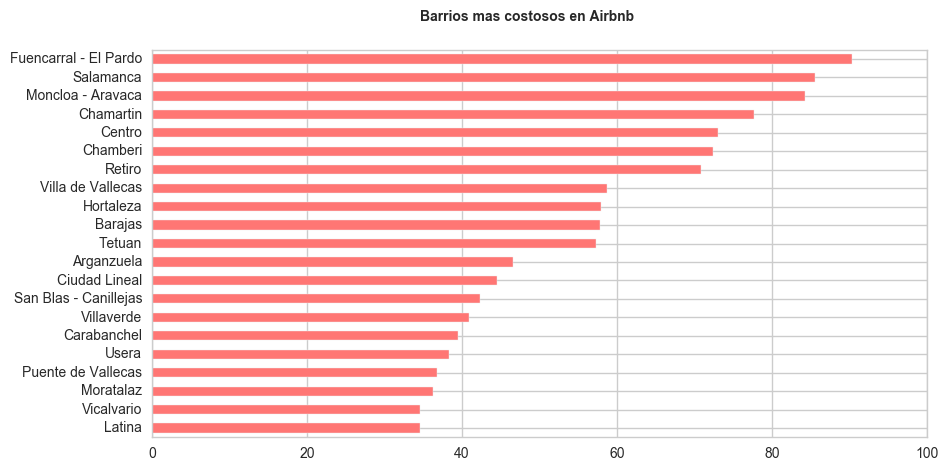

In [27]:
area2 = listing.groupby('neighbourhood_group_cleansed')
nb_price = area2['price'].agg([np.sum, np.mean, np.std]).sort_values(['mean'])

fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Barrios mas costosos en Airbnb', fontsize=10, fontweight='bold')
nb_price['mean'].plot(kind='barh', ax=ax, color='#FF7674')
plt.ylabel('')

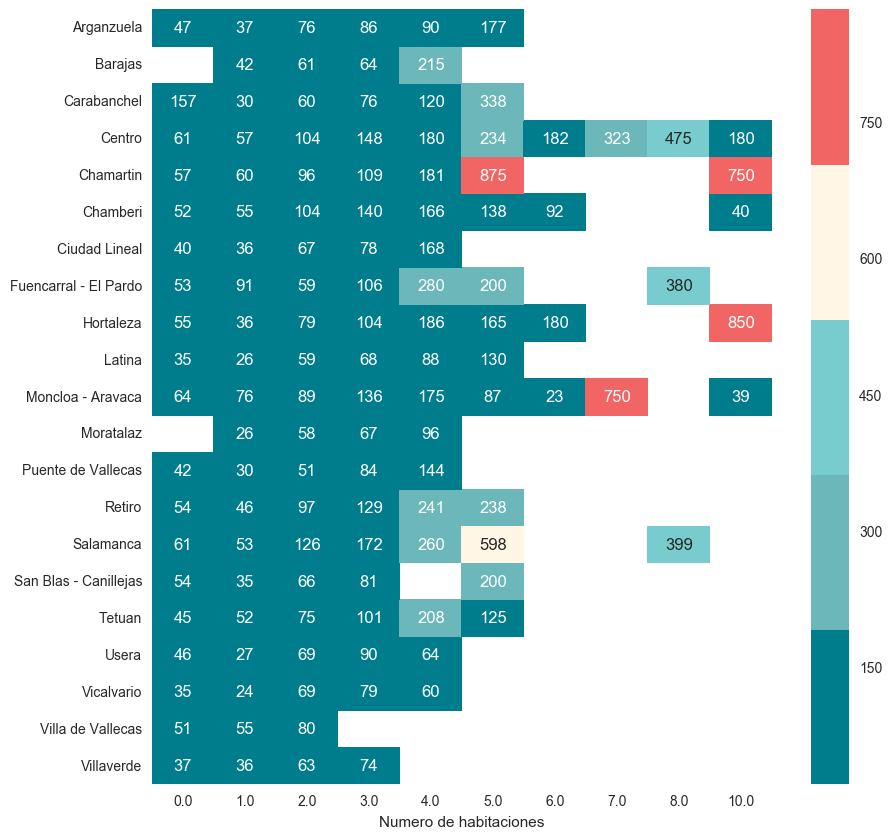

In [28]:
# HeatMap variación de precios según número de dormitorios

plt.figure(figsize=(10,10))
sns.heatmap(listing.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap=my_cmap)
plt.ylabel('')
plt.xlabel('Numero de habitaciones')

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Podemos decir que existe un patrón de que entre más habitaciones y la ubicación del piso en alquiler, este puede ser más costoso.</span>
</div>

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Relación entre el precio y demás "features" o características de los pisos.</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">
Veremos de forma visual, cuáles son las caráterísticas presentes en los pisos de alquiler en Madrid y cómo están reflejados en el precio de alquiler en AirBnB</span>
</div>

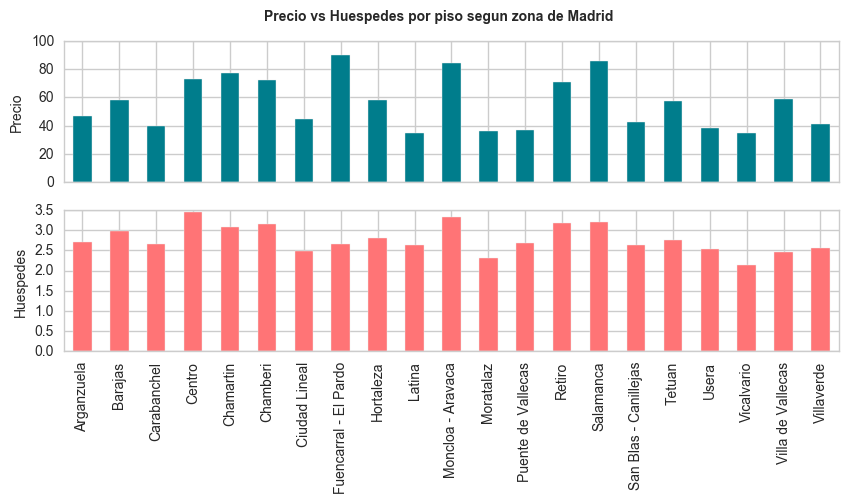

In [29]:
area = listing.groupby('neighbourhood_group_cleansed')
price = area['price'].agg([np.sum, np.mean, np.std])
accommodates = area['accommodates'].agg([np.sum, np.mean, np.std])

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 4))
fig.suptitle('Precio vs Huespedes por piso segun zona de Madrid', fontsize=10, fontweight='bold')
price['mean'].plot(kind='bar', ax=ax[0], color='#007D8C')
accommodates['mean'].plot(kind='bar', ax=ax[1], color = '#FF7476')

ax[0].set_ylabel('Precio', fontsize=10)
ax[1].set_ylabel('Huespedes', fontsize=10)
plt.xlabel('')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

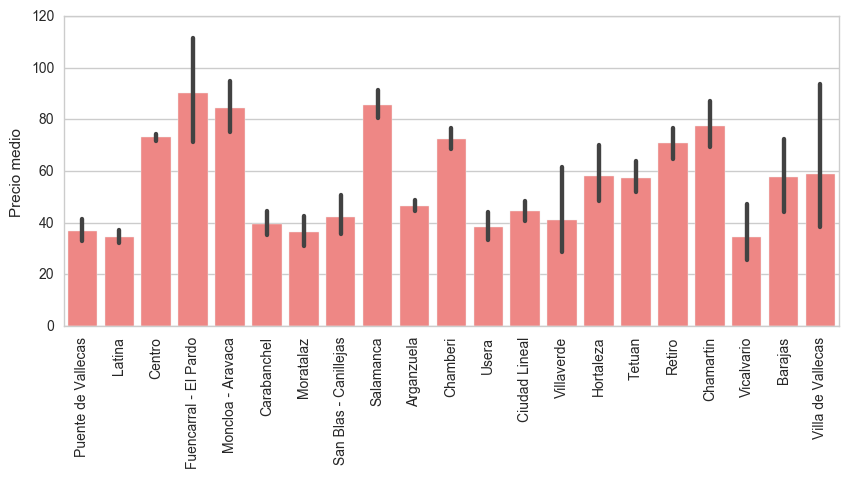

In [30]:
plt.figure(figsize=(10,4))
sns.barplot(y='price',x='neighbourhood_group_cleansed',data=listing, color = '#FF7674')
plt.ylabel('Precio medio')
plt.xlabel('')
plt.xticks(rotation=90)


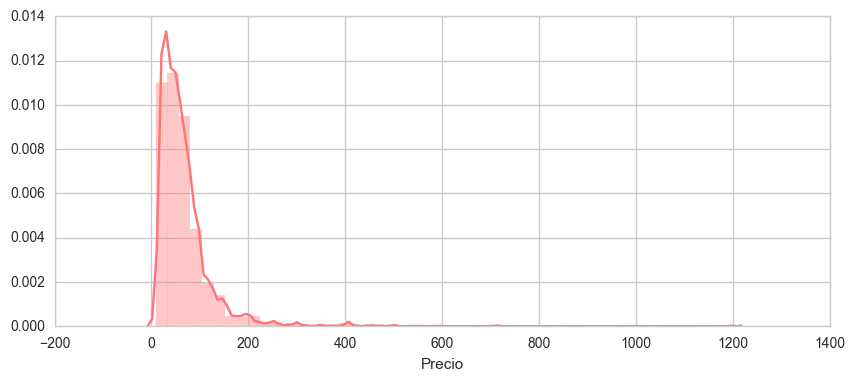

In [31]:
plt.figure(figsize=(10,4))
sns.distplot(listing['price'], color = '#FF7476')
plt.xlabel('Precio')
plt.show()

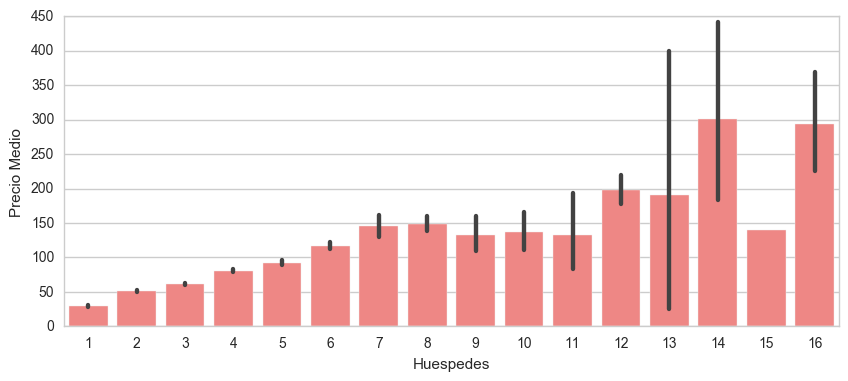

In [32]:
plt.figure(figsize=(10,4))
sns.barplot(y='price',x='accommodates',data=listing, color = '#FF7674')
plt.ylabel('Precio Medio')
plt.xlabel('Huespedes')

<br><div style="text-align: left;">
    <span style="font-weight: bold; color:#FF7674; font-family: 'Courier New'; font-size: 2em;">Diagramas para representar dispersión</span>
</div>

<div style="text-align: left;">
    <span style="color:#2467C0; font-family: 'Courier New'; font-size: 1.5em;">En el siguiente conjunto de gráficas, mostraremos la dispersión de los pisos por barrios y según sus precios de alquiler. Estas gráficas nos permiten entender de forma visual, cómo se reparten los pisos de AirBnB en la ciudad de Madrid.</span>
</div>

[<matplotlib.text.Text at 0xe626668>, <matplotlib.text.Text at 0x20267e10>]

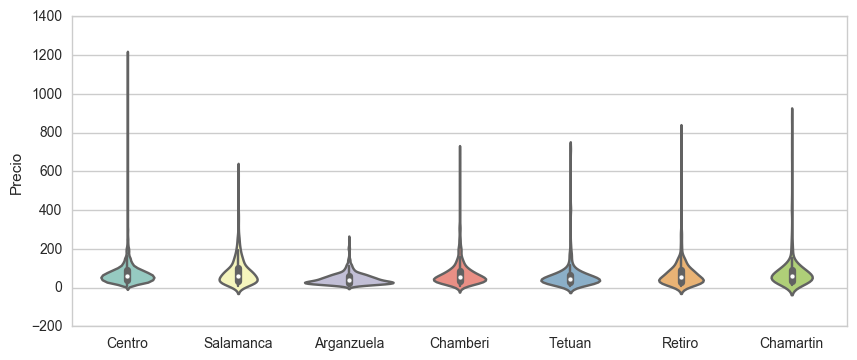

In [33]:
plt.figure(figsize=(10,4))

first = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') ]

a=sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=first, palette="Set3")
a.set(xlabel='', ylabel='Precio')


[<matplotlib.text.Text at 0x1fd8ddd8>, <matplotlib.text.Text at 0x1fd6c518>]

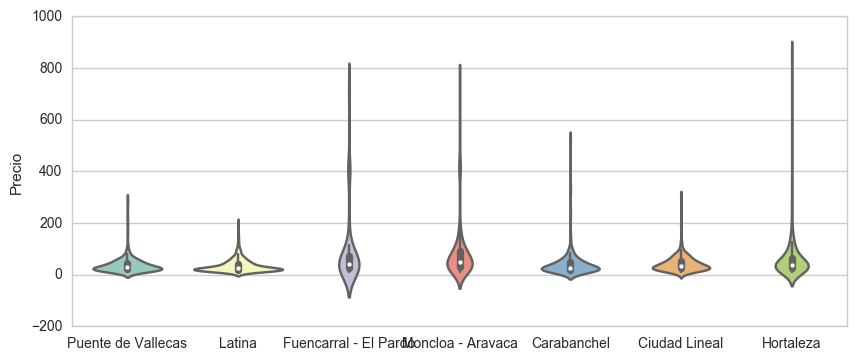

In [34]:
plt.figure(figsize=(10,4))

second = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
                     (listing['neighbourhood_group_cleansed'] == 'Latina') |
                     (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
                     (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
                     (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
                     (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')]

b=sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=second, palette="Set3")
b.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x1d229c18>, <matplotlib.text.Text at 0x158f5208>]

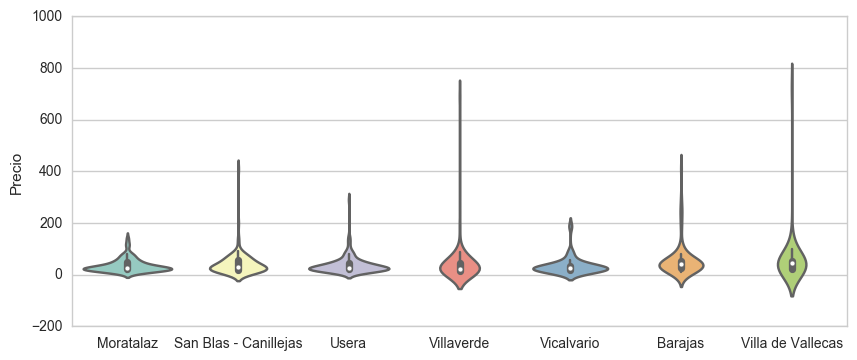

In [35]:
plt.figure(figsize=(10,4))

third = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Usera') |
                     (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
                     (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
                     (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
                     (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
                     (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
                     (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]

c = sns.violinplot(x="neighbourhood_group_cleansed", y="price", data=third, palette="Set3")
c.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0xf270b70>, <matplotlib.text.Text at 0x106a2748>]

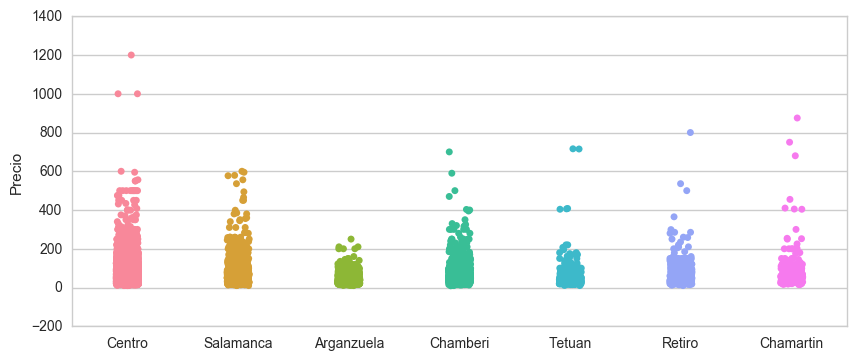

In [36]:
plt.figure(figsize=(10,4))
a = sns.stripplot(data=first,y='price',x='neighbourhood_group_cleansed',jitter=True)
a.set(xlabel='', ylabel='Precio')


[<matplotlib.text.Text at 0xe6f9080>, <matplotlib.text.Text at 0xf270fd0>]

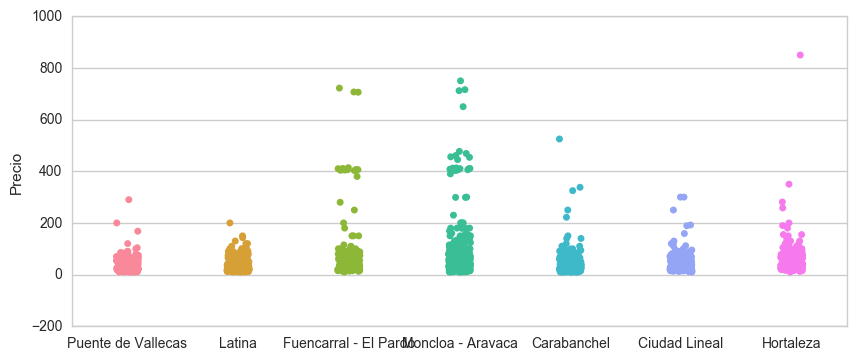

In [37]:
plt.figure(figsize=(10,4))
b = sns.stripplot(data=second,y='price',x='neighbourhood_group_cleansed',jitter=True)
b.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0xe401438>, <matplotlib.text.Text at 0x2039e240>]

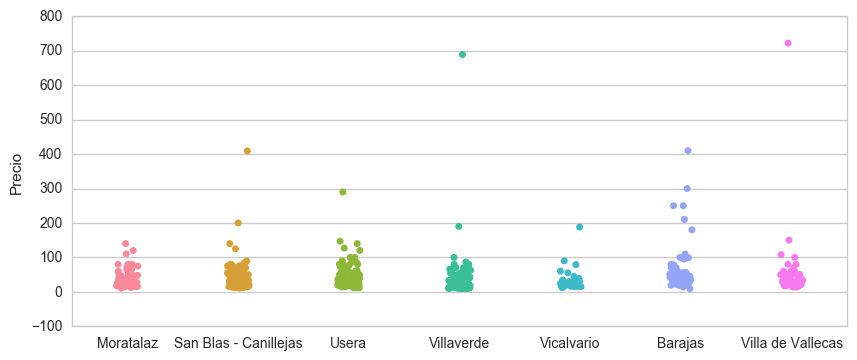

In [38]:
plt.figure(figsize=(10,4))
c = sns.stripplot(data=third,y='price',x='neighbourhood_group_cleansed',jitter=True)
c.set(xlabel='', ylabel='Precio')

[<matplotlib.text.Text at 0x10499518>, <matplotlib.text.Text at 0x10496208>]

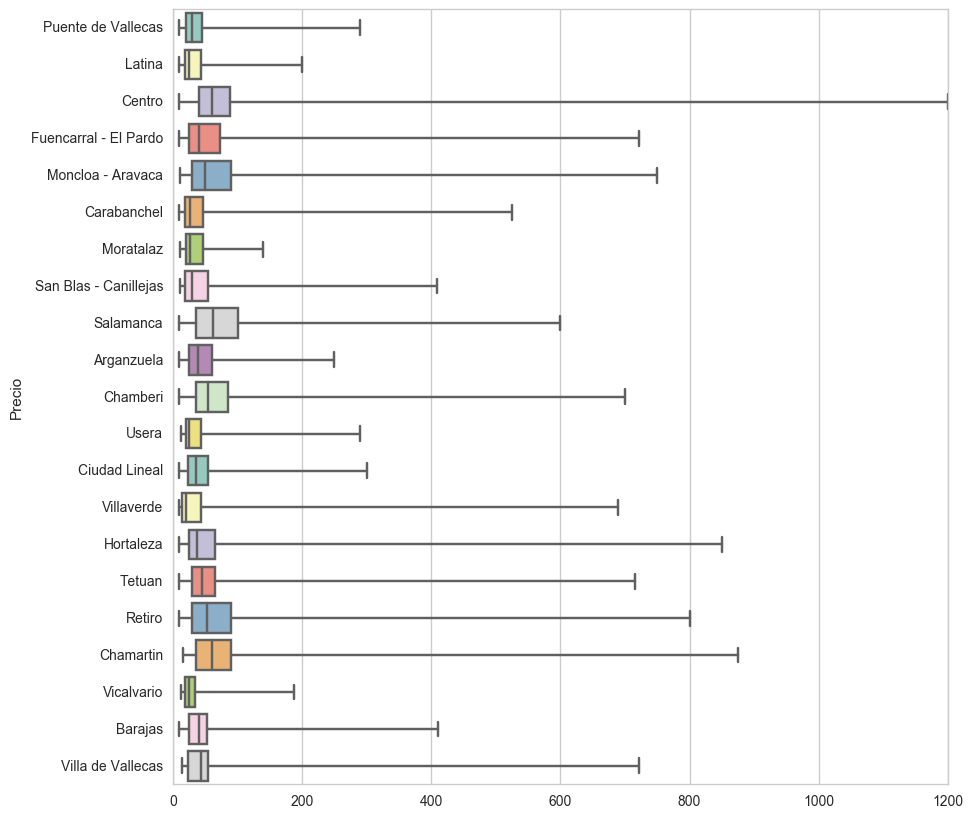

In [39]:
plt.figure(figsize=(10,10))

todos = listing.loc[(listing['neighbourhood_group_cleansed'] == 'Centro') | 
           (listing['neighbourhood_group_cleansed'] == 'Chamberi') |
           (listing['neighbourhood_group_cleansed'] == 'Salamanca') | 
           (listing['neighbourhood_group_cleansed'] == 'Arganzuela') | 
           (listing['neighbourhood_group_cleansed'] == 'Tetuan') |
           (listing['neighbourhood_group_cleansed'] == 'Retiro') |
           (listing['neighbourhood_group_cleansed'] == 'Chamartin') |
           (listing['neighbourhood_group_cleansed'] == 'Moncloa - Aravaca') |
            (listing['neighbourhood_group_cleansed'] == 'Latina') |
            (listing['neighbourhood_group_cleansed'] == 'Carabanchel') | 
            (listing['neighbourhood_group_cleansed'] == 'Ciudad Lineal') |
            (listing['neighbourhood_group_cleansed'] == 'Puente de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Hortaleza') |
            (listing['neighbourhood_group_cleansed'] == 'Fuencarral - El Pardo')|
            (listing['neighbourhood_group_cleansed'] == 'Usera') |
            (listing['neighbourhood_group_cleansed'] == 'San Blas - Canillejas') |
            (listing['neighbourhood_group_cleansed'] == 'Villaverde') |
            (listing['neighbourhood_group_cleansed'] == 'Barajas') | 
            (listing['neighbourhood_group_cleansed'] == 'Moratalaz') |
            (listing['neighbourhood_group_cleansed'] == 'Villa de Vallecas') |
            (listing['neighbourhood_group_cleansed'] == 'Vicalvario')]

a = sns.boxplot(x="price", y="neighbourhood_group_cleansed", data=todos, whis=np.inf, palette="Set3")

a.set(xlabel='', ylabel='Precio')
